In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
data = pd.read_csv("housing.csv")

In [100]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [101]:
data.dropna(inplace = True)

In [102]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [104]:
train_data = x_train.join(y_train)

In [105]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15568,-117.04,33.09,16.0,4677.0,581.0,1902.0,566.0,6.1834,<1H OCEAN,335600.0
8100,-118.21,33.80,45.0,1160.0,274.0,1095.0,269.0,2.7308,NEAR OCEAN,139000.0
18573,-121.76,36.91,23.0,1276.0,437.0,1359.0,376.0,1.9609,<1H OCEAN,155000.0
10534,-117.69,33.51,4.0,1223.0,275.0,505.0,244.0,4.6607,<1H OCEAN,173000.0
13852,-117.28,34.51,10.0,4676.0,884.0,2845.0,812.0,3.0181,INLAND,100400.0
...,...,...,...,...,...,...,...,...,...,...
4119,-118.20,34.14,52.0,3800.0,646.0,1842.0,620.0,5.5524,<1H OCEAN,293900.0
14697,-117.09,32.79,36.0,1936.0,345.0,861.0,343.0,3.8333,NEAR OCEAN,170000.0
4824,-118.31,34.04,33.0,2691.0,726.0,2390.0,681.0,2.4048,<1H OCEAN,208300.0
18623,-122.03,37.05,12.0,2010.0,422.0,784.0,407.0,3.9728,NEAR OCEAN,190900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

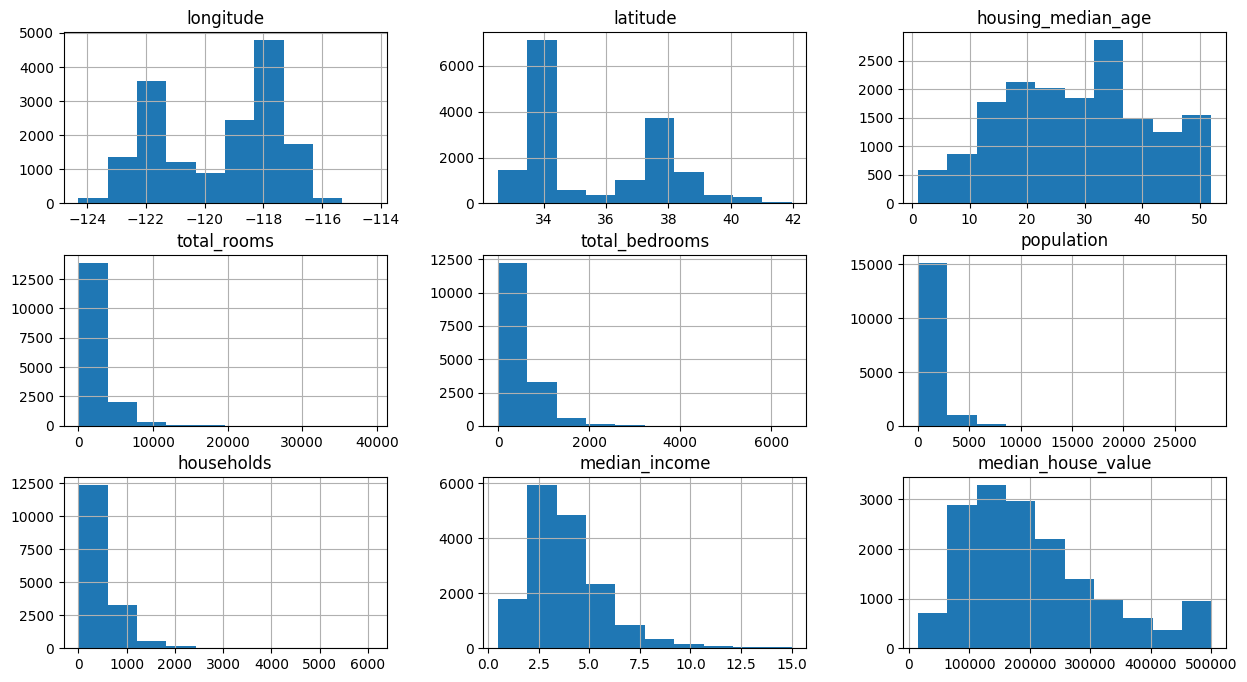

In [106]:
train_data.hist(figsize= (15,8))

<Axes: >

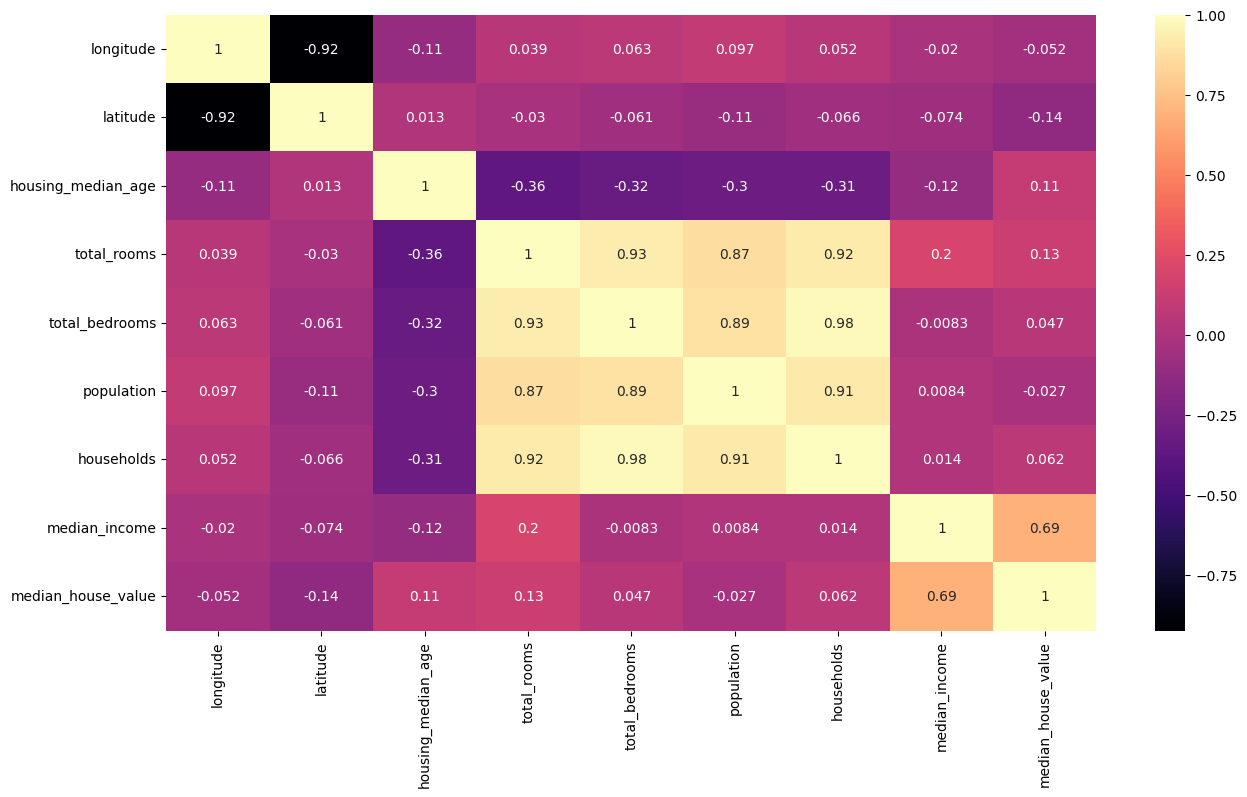

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot= True, cmap= "magma")

In [108]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

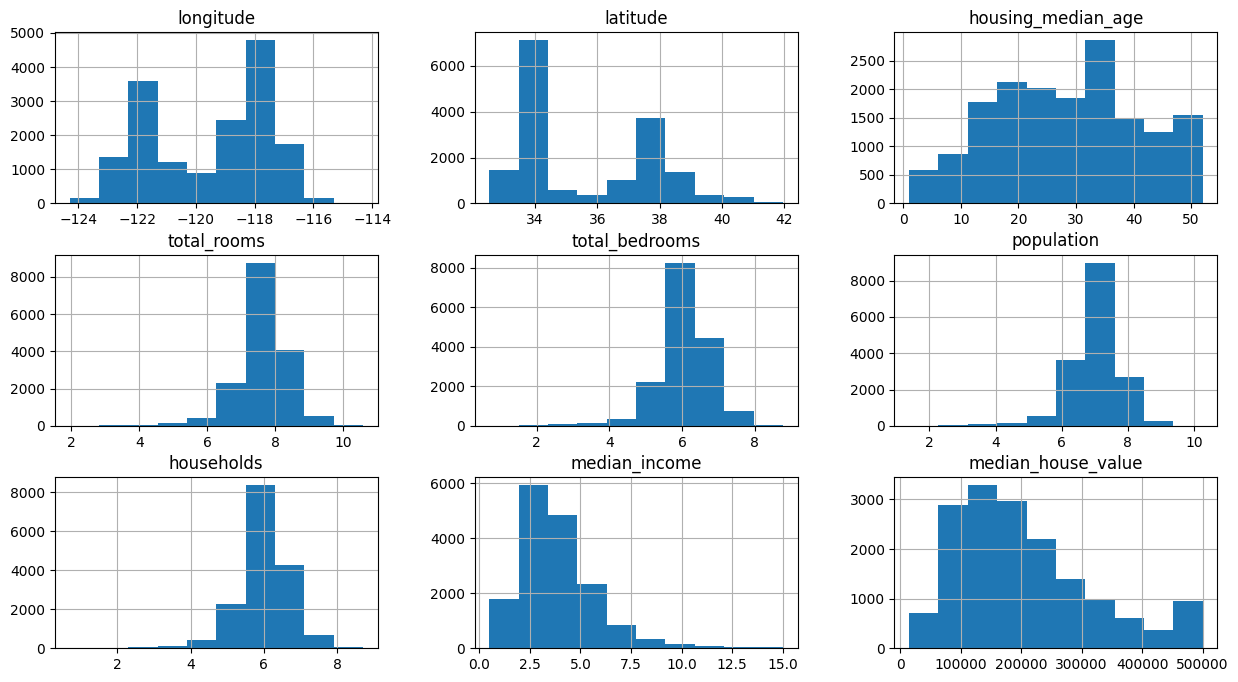

In [109]:
train_data.hist(figsize= (15,8))

In [111]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7234
INLAND        5187
NEAR OCEAN    2105
NEAR BAY      1817
ISLAND           3
Name: count, dtype: int64

In [115]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [116]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15568,-117.04,33.09,16.0,8.450626,6.366470,7.551187,6.340359,6.1834,335600.0,True,False,False,False,False
8100,-118.21,33.80,45.0,7.057037,5.616771,6.999422,5.598422,2.7308,139000.0,False,False,False,False,True
18573,-121.76,36.91,23.0,7.152269,6.082219,7.215240,5.932245,1.9609,155000.0,True,False,False,False,False
10534,-117.69,33.51,4.0,7.109879,5.620401,6.226537,5.501258,4.6607,173000.0,True,False,False,False,False
13852,-117.28,34.51,10.0,8.450412,6.785588,7.953670,6.700731,3.0181,100400.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,-118.20,34.14,52.0,8.243019,6.472346,7.519150,6.431331,5.5524,293900.0,True,False,False,False,False
14697,-117.09,32.79,36.0,7.568896,5.846439,6.759255,5.840642,3.8333,170000.0,False,False,False,False,True
4824,-118.31,34.04,33.0,7.898040,6.588926,7.779467,6.525030,2.4048,208300.0,True,False,False,False,False
18623,-122.03,37.05,12.0,7.606387,6.047372,6.665684,6.011267,3.9728,190900.0,False,False,False,False,True
